In [1]:
# 데이터 추출
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 153s 8ms/step - loss: 0.5219 - acc: 0.7477 - val_loss: 0.3962 - val_acc: 0.8290
Epoch 2/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.2936 - acc: 0.8849 - val_loss: 0.3233 - val_acc: 0.8706
Epoch 3/10
20000/20000 [==============================] - 152s 8ms/step - loss: 0.2362 - acc: 0.9112 - val_loss: 0.3061 - val_acc: 0.8892
Epoch 4/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.1958 - acc: 0.9275 - val_loss: 0.2973 - val_acc: 0.8778
Epoch 5/10
20000/20000 [==============================] - 150s 8ms/step - loss: 0.1760 - acc: 0.9345 - val_loss: 0.3784 - val_acc: 0.8662
Epoch 6/10
20000/20000 [==============================] - 152s 8ms/step - loss: 0.1544 - acc: 0.9460 - val_loss: 0.2983 - val_acc: 0.8814
Epoch 7/10
20000

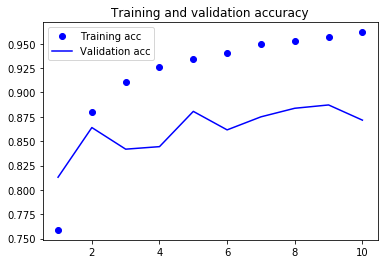

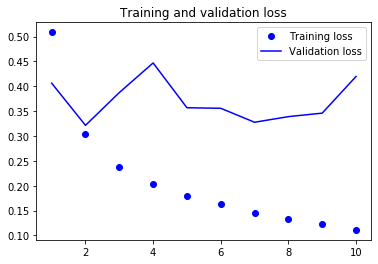

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()